<b>Uwaga:</b> Należy rozwiązać oba poniższe zadania. Na zaliczenie potrzeba co najmniej 3 pkt. 
<p></p>

1. <b>Zadanie 1.</b>(2x1.5 pkt): Zreplikować wyniki  związane z  materiałem na stronie <a href="https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/">2d fourier transform in python and fourier synthesis of images</a>. Istotą tego zadania jest poprawne zrozumienie działania transformaty Fouriera na obrazach  - jego zaliczenie będzie polegało na odpowiedzi na dwa pytania teoretyczne.

2. <b>Zadanie 2.</b>(2x1 pkt): Napisać kod dwóch filtrów opartych o transformatę Fouriera: dolno i górnoprzepustowego. W pierwszym przypadku przykładowy obraz dobrej jakości zaburzyć kolejno trzema różnymi szumami dostępnyhmi w programie Gimp. W każdym przypadku zastosować filtr dolnoprzepustowy możliwie dokładnie przywracający obraz przed zaszumieniem. Następnie wygenerować filtr górnoprzepustowy wizualizujący w trzech powyższych przypadkach postać dodanego szumu.  Materiał referencyjny znajduje się m.in. na stronie
<a href="https://fairyonice.github.io/Low-and-High-pass-filtering-experiments.html">Low and High pass filtering experiments.html</a>. 

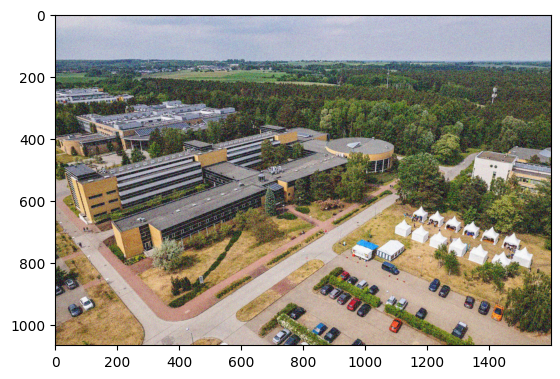

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.757753222571058e-06..1.1031931990186616].


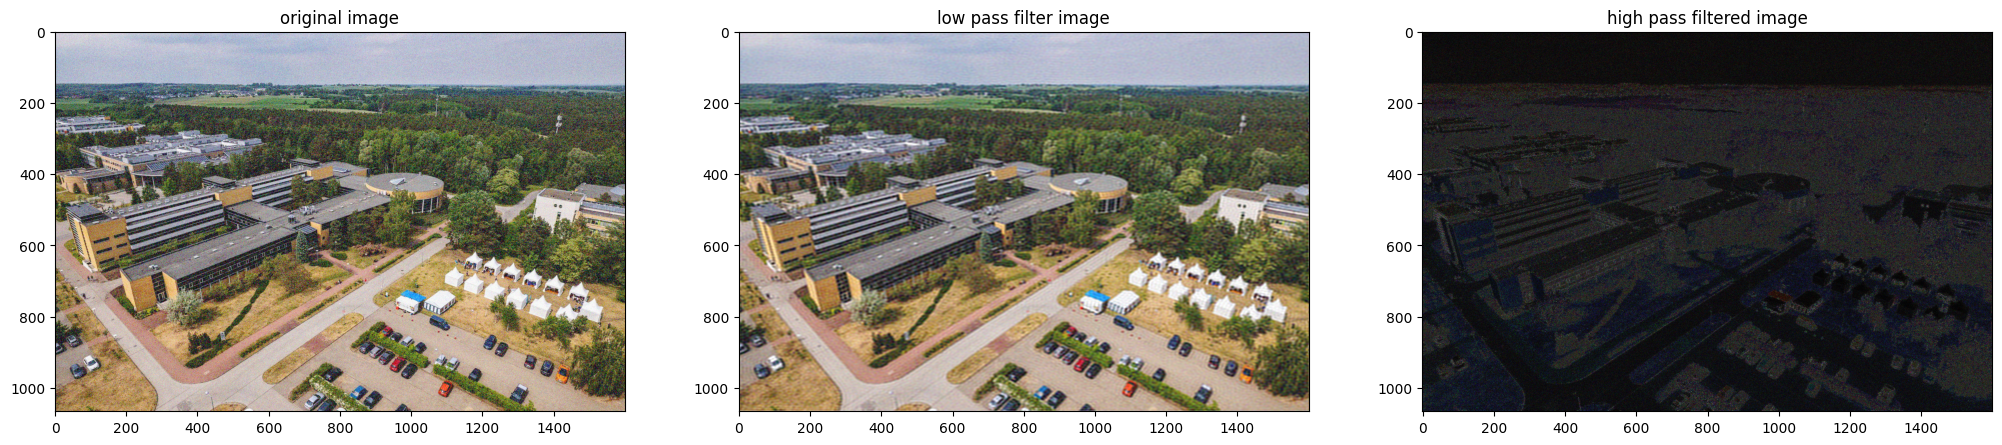

In [1]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread("wmi1.jpg")/float(2**8)
plt.imshow(img)
plt.show()

shape = img.shape[:2]

def draw_cicle(shape,diamiter):
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    center = np.array(TF.shape)/2.0

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2
    return(TF)


TFcircleIN   = draw_cicle(shape=img.shape[:2],diamiter=150)
TFcircleOUT  = ~TFcircleIN



fft_img = np.zeros_like(img,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(img[:,:,ichannel]))



def filter_circle(TFcircleIN,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    return(temp)

fft_img_filtered_IN = []
fft_img_filtered_OUT = []
## for each channel, pass filter
for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    ## circle IN
    temp = filter_circle(TFcircleIN,fft_img_channel)
    fft_img_filtered_IN.append(temp)
    ## circle OUT
    temp = filter_circle(TFcircleOUT,fft_img_channel)
    fft_img_filtered_OUT.append(temp) 
    
fft_img_filtered_IN = np.array(fft_img_filtered_IN)
fft_img_filtered_IN = np.transpose(fft_img_filtered_IN,(1,2,0))
fft_img_filtered_OUT = np.array(fft_img_filtered_OUT)
fft_img_filtered_OUT = np.transpose(fft_img_filtered_OUT,(1,2,0))





def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)

fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,3,1)
ax.imshow(np.abs(img_reco))
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(np.abs(img_reco_filtered_IN))
ax.set_title("low pass filter image")


ax  = fig.add_subplot(1,3,3)
ax.imshow(np.abs(img_reco_filtered_OUT))
ax.set_title("high pass filtered image")
plt.show()